In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [ ]:
d=pd.read_csv('insurance_claims.csv')

In [ ]:
d.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
d.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
d.drop('_c39',axis=1,inplace=True)
d.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
def miss_value(df):
    miss_v=df.isnull().sum()

    #percent
    miss_v_percent=100*d.isnull().sum()/len(d)

     #make table with this result
    miss_v_t=pd.concat([miss_v,miss_v_percent],axis=1)

    #rename the columns
    miss_v_t_ren_columns=miss_v_t.rename(columns={0:'missing_values',1:'% of total values'})

    #sort
    miss_v_t_ren_columns=miss_v_t_ren_columns[miss_v_t_ren_columns.iloc[:,1] !=0].sort_values('% of total values', ascending=False).round(1)



    print('your selected data frame has' + str(d.shape[1]) +'columns.\n'
          'there are' + str(miss_v_t_ren_columns.shape[0]) +'colums that have missing values')

    #return the data frame with missing information
    return miss_v_t_ren_columns

missing_values=miss_value(d)
print(missing_values)

your selected data frame has39columns.
there are1colums that have missing values
                       missing_values  % of total values
authorities_contacted              91                9.1


In [ ]:
d.isnull()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
d.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [ ]:
d['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [ ]:
for col in d:
    print(col,'  ',d[col].dtype)

months_as_customer    int64
age    int64
policy_number    int64
policy_bind_date    object
policy_state    object
policy_csl    object
policy_deductable    int64
policy_annual_premium    float64
umbrella_limit    int64
insured_zip    int64
insured_sex    object
insured_education_level    object
insured_occupation    object
insured_hobbies    object
insured_relationship    object
capital-gains    int64
capital-loss    int64
incident_date    object
incident_type    object
collision_type    object
incident_severity    object
authorities_contacted    object
incident_state    object
incident_city    object
incident_location    object
incident_hour_of_the_day    int64
number_of_vehicles_involved    int64
property_damage    object
bodily_injuries    int64
witnesses    int64
police_report_available    object
total_claim_amount    int64
injury_claim    int64
property_claim    int64
vehicle_claim    int64
auto_make    object
auto_model    object
auto_year    int64
fraud_reported    object


In [ ]:
le=LabelEncoder()
for col in d:

    #print(col,'  ',df[col].dtype)
    if d[col].dtype=='object':

        if len(d[col].unique())<=2:

            print(col)

            le.fit(d[col])
            d[col]=le.transform(d[col])

insured_sex
fraud_reported


In [ ]:
d['insured_sex'].head()

,insured_sex
0,1
1,1
2,0
3,0
4,1


In [ ]:
col_name=[]
unique_value=[]
for col in d:
     if d[col].dtype=='object':

        col_name.append(str(col))
        unique_value.append(d[col].nunique())
table=pd.DataFrame()
table['col_name']=col_name
table['Value']=unique_value

table=table.sort_values('Value',ascending=False)
table

,col_name,Value
14,incident_location,1000
0,policy_bind_date,951
7,incident_date,60
18,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
17,auto_make,14
13,incident_city,7
3,insured_education_level,7
12,incident_state,7


In [ ]:
d.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'], axis=1,
        inplace=True)

In [ ]:
d.shape

(1000, 33)

<Axes: xlabel='insured_hobbies', ylabel='count'>

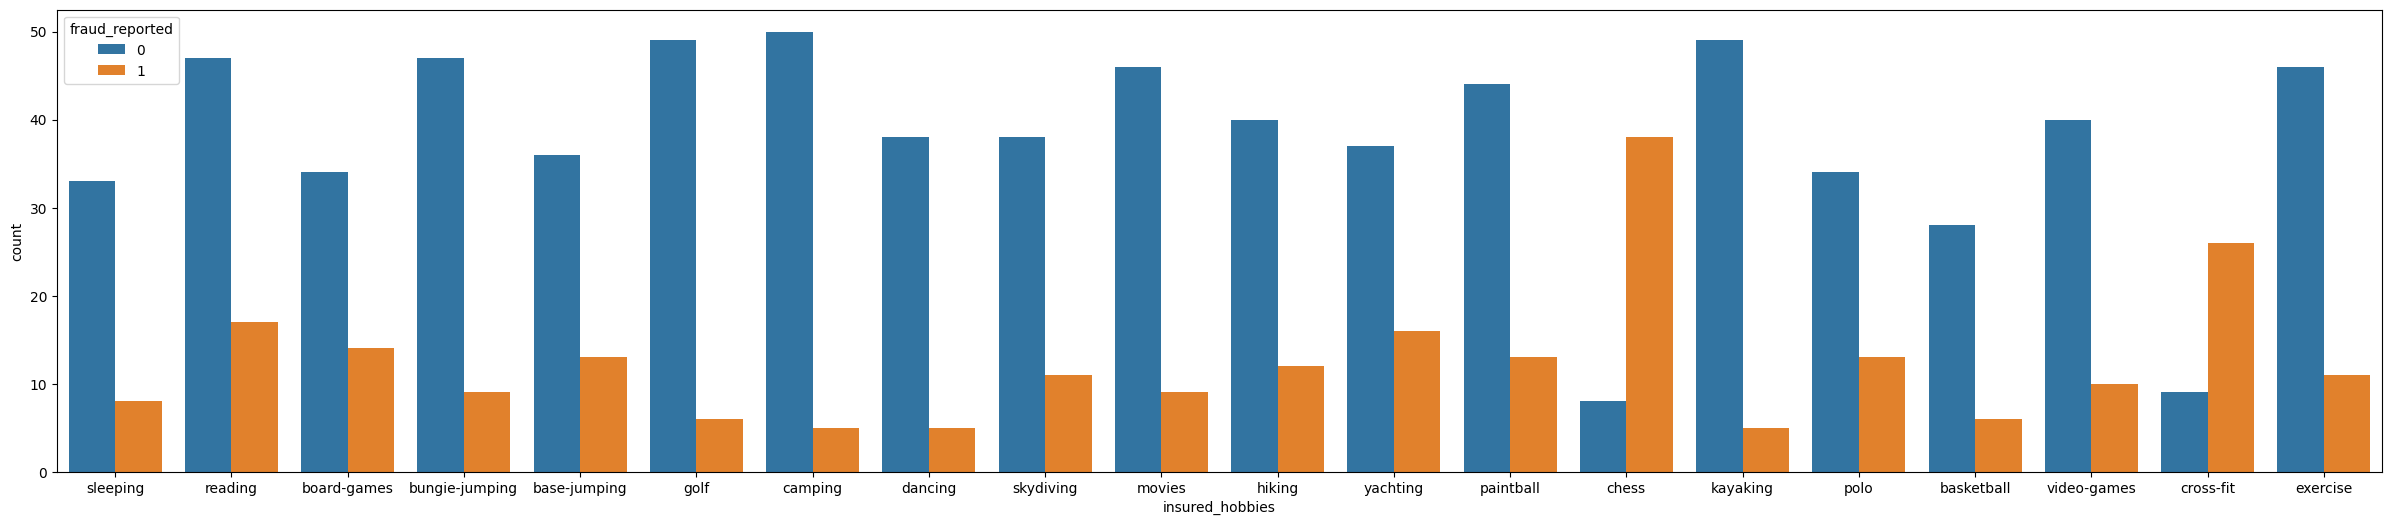

In [ ]:
f,ax=plt.subplots(figsize=(30,6))
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=d)

In [ ]:
d['insured_hobbies']=d['insured_hobbies'].apply(lambda x:'other' if x!='chess' and x!='cross_fit' else x)

In [ ]:
d['insured_hobbies']

,insured_hobbies
0,other
1,other
2,other
3,other
4,other
...,...
995,other
996,other
997,other
998,other


In [ ]:
col_name=[]
unique_value=[]
for col in d:
     if d[col].dtype=='object':

        col_name.append(str(col))
        unique_value.append(d[col].nunique())
table=pd.DataFrame()
table['col_name']=col_name
table['Value']=unique_value

table=table.sort_values('Value',ascending=False)
table

,col_name,Value
13,auto_make,14
2,insured_education_level,7
9,incident_state,7
10,incident_city,7
4,insured_relationship,6
5,incident_type,4
8,authorities_contacted,4
7,incident_severity,4
6,collision_type,4
0,policy_state,3


In [ ]:
d=pd.get_dummies(d)

In [ ]:
d.shape

(1000, 90)

In [ ]:
d.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,466132,1,53300,0,5,...,False,False,False,False,False,False,True,False,False,False
1,228,42,2000,1197.22,5000000,468176,1,0,0,8,...,False,False,False,False,True,False,False,False,False,False
2,134,29,2000,1413.14,5000000,430632,0,35100,0,7,...,True,False,False,False,False,False,False,False,False,False
3,256,41,2000,1415.74,6000000,608117,0,48900,-62400,5,...,False,False,False,False,False,False,False,False,False,False
4,228,44,1000,1583.91,6000000,610706,1,66000,-46000,20,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x=d.drop(['fraud_reported'], axis=1,inplace=False)
y=d['fraud_reported']

In [ ]:
x.shape

(1000, 89)

In [ ]:
y.shape

(1000,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
r1=classification_report(y_test,y_pred)

In [ ]:
print(r1)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       227
           1       0.58      0.60      0.59        73

    accuracy                           0.80       300
   macro avg       0.72      0.73      0.73       300
weighted avg       0.80      0.80      0.80       300



In [ ]:
r2=accuracy_score(y_test,y_pred)

In [ ]:
print(r2)

0.7966666666666666


In [ ]:
r3=confusion_matrix(y_test,y_pred)

In [ ]:
print(r3)

[[195  32]
 [ 29  44]]


In [ ]:
y_test.value_counts()

,count
fraud_reported,
0,227
1,73


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
model_lr=LogisticRegression(random_state=42,max_iter=1000)
model_lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred=model_lr.predict(x_test)

In [ ]:
r1=classification_report(y_test,y_pred)
print(r1)
r3=confusion_matrix(y_test,y_pred)
print(r3)

              precision    recall  f1-score   support

           0       0.75      0.99      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.75      0.65       200

[[150   1]
 [ 49   0]]


In [ ]:
params= {
    "objective" : "binary",
    "n_estimators":1000,
    "reg_alpha" : 0.5,
    " reg_lambda":0.5,
    "n_jobs":-1,
    "colsample_bytree":.8,
    "min_child_weight":8,
    "subsample":0.8715623,
    "min_data_in_leaf":30,
    "nthread":4,
    "metric" : "f1",
    "num_leaves" : 10,
    "learning_rate" : 0.01,
    "verbosity" : -1,
    "seed": 60,
    "max_bin":60,
    'max_depth':3,
    'min_gain_to_split':.0222415,
    'scale_pos_weight':1.4,
    'bagging_fraction':0.8,
        }

In [ ]:
lgb_train=lgb.Dataset(x_train,label=y_train)
lgb_test=lgb.Dataset(x_test,label=y_test)
model_lgb=lgb.train(params,lgb_train,valid_sets=[lgb_test,lgb_train])

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
y_pred=model_lgb.predict(x_test,num_iteration=1000)
y_pred

array([0.28406585, 0.43109016, 0.11299902, 0.0386283 , 0.0434001 ,
       0.08020538, 0.58693192, 0.5762974 , 0.10499387, 0.7372624 ,
       0.86512269, 0.25471707, 0.54943542, 0.07047742, 0.81339766,
       0.28471621, 0.0853985 , 0.03111579, 0.07471636, 0.36632739,
       0.5015274 , 0.64219405, 0.06694082, 0.15833945, 0.04439313,
       0.06293033, 0.03259725, 0.47298203, 0.0384902 , 0.07959693,
       0.06446682, 0.73370465, 0.51156977, 0.09213449, 0.03490829,
       0.63405268, 0.82946331, 0.07460744, 0.02708856, 0.06097084,
       0.03179026, 0.62958443, 0.02497245, 0.58480962, 0.07004483,
       0.76632528, 0.06121725, 0.69279942, 0.27892374, 0.71214114,
       0.65488018, 0.18070055, 0.1948552 , 0.01777944, 0.04708826,
       0.05556546, 0.81828135, 0.03665586, 0.74918136, 0.20052592,
       0.04911368, 0.6363682 , 0.04007814, 0.04540157, 0.22910692,
       0.02454183, 0.19842541, 0.83293892, 0.10267822, 0.1791531 ,
       0.04204106, 0.6581361 , 0.08912973, 0.09617916, 0.42634

In [ ]:
y_pred=(model_lgb.predict(x_test)>0.5).astype('int32')
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0], dtype=int32)

In [ ]:
r1=classification_report(y_test,y_pred)
print(r1)
r3=confusion_matrix(y_test,y_pred)
print(r3)

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       151
           1       0.58      0.71      0.64        49

    accuracy                           0.81       200
   macro avg       0.74      0.77      0.75       200
weighted avg       0.82      0.81      0.81       200

[[126  25]
 [ 14  35]]


In [ ]:
model_dl=Sequential([
    Dense(256,activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_dl.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,297 (122.25 KB)

 Trainable params: 31,297 (122.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_dl.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model_dl.fit(x_train,y_train,epochs=50, batch_size=64,verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6316 - loss: 14703.7217
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6349 - loss: 12123.9023 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 9758.3223 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6016 - loss: 9640.1387  
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5937 - loss: 7508.1763 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6095 - loss: 7307.5620  
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6088 - loss: 8349.9697 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6606 - loss: 5530.6538 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6616 - loss: 6116.4370
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6925 - loss: 5042.1069 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6547 - loss: 5141.9473
Epoch 12/50
13/13 ━━━━━━━━━━━

In [ ]:
y_pred=model_dl.predict(x_test)
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 


array([[0.       ],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.4911515],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.4911515],
